C:\Users\NZO BUSINESS\AppData\Local\Temp\ipykernel_12152\1218649930.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('C:/Users/NZO BUSINESS/Documents/Assimilation/data.csv', header=0, index_col=0, parse_dates=True, date_parser=analyseur)
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\NZO BUSINESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficient de corrélation (P + 1) : 0.751
RMSE (P + 1) : 17.417


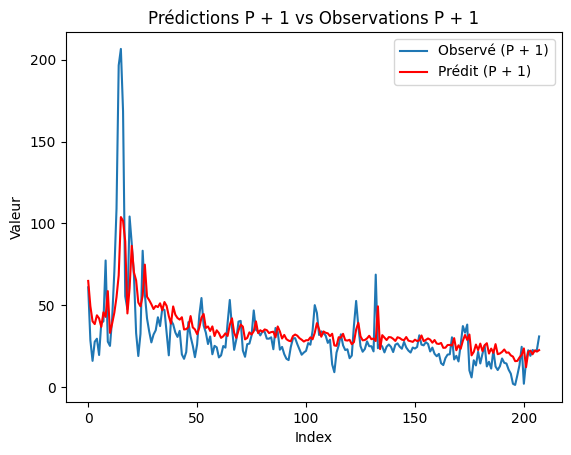

Prédictions P + 1 enregistrées dans 'predictions_p_plus_one.csv'


In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Définition d'une fonction d'analyseur pour convertir les chaînes de date en objets datetime
def analyseur(x):
    return pd.to_datetime(x)

# Chargement du jeu de données à partir d'un fichier CSV
series = pd.read_csv('C:/Users/NZO BUSINESS/Documents/Assimilation/data.csv', header=0, index_col=0, parse_dates=True, date_parser=analyseur)

# Suppression des lignes avec des valeurs manquantes (NaN)
series = series.dropna()

# Conversion de l'index en un Index de périodes avec une fréquence quotidienne
series.index = series.index.to_period('D')

# Extraction des valeurs de la colonne 'Bel Air' en tant que données de séries temporelles
X = series['Bel Air'].values

# Calcul de la taille pour l'ensemble d'entraînement (80 % des données)
size = int(len(X) * 0.80)

# Séparation des données en ensembles d'entraînement et de test
train, test = X[0:size], X[size:len(X)]

# Initialisation d'un buffer P + 1 pour stocker les valeurs prédites
buffer_plus_one = []

# Initialisation d'une liste pour stocker les observations correspondantes (P + 1)
observed_plus_one = []

# Boucle de validation pas à pas
for t in range(len(test)):
    # Création d'un modèle ARIMA avec un ordre de (3, 0, 2)
    model = ARIMA(train, order=(3, 0, 2))
    
    # Ajustement du modèle aux données historiques
    model_fit = model.fit()
    
    # Prévision de la prochaine valeur (P + 1)
    yhat = model_fit.forecast(steps=2)[1]  # Prévision de la deuxième valeur (P + 1)
    
    # Stockage de la valeur prédite
    buffer_plus_one.append(yhat)
    
    # Stockage de la valeur réelle correspondante (P + 1)
    observed_plus_one.append(test[t])
    
    # Ajout de la valeur réelle aux données d'entraînement pour la prochaine itération
    train = np.append(train, test[t])

# Calcul du coefficient de corrélation entre les valeurs prédites et observées (P + 1)
correlation = np.corrcoef(observed_plus_one, buffer_plus_one)[0, 1]
print('Coefficient de corrélation (P + 1) : %.3f' % correlation)

# Calcul de l'erreur quadratique moyenne (RMSE) entre les valeurs prédites et observées (P + 1)
rmse = np.sqrt(mean_squared_error(observed_plus_one, buffer_plus_one))
print('RMSE (P + 1) : %.3f' % rmse)

# Création d'un DataFrame pour les prédictions P + 1 et les observations correspondantes
results_df = pd.DataFrame({'Observé (P + 1)': observed_plus_one, 'Prédit (P + 1)': buffer_plus_one})

# Sauvegarde du DataFrame dans un fichier CSV
results_df.to_csv('predictions_p_plus_one2222.csv', index=False)

# Tracé des valeurs observées (P + 1) et prédites (P + 1)
plt.plot(observed_plus_one, label='Observé (P + 1)')
plt.plot(buffer_plus_one, color='red', label='Prédit (P + 1)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.title('Prédictions P + 1 vs Observations P + 1')
plt.show()

# Affichage d'un message de confirmation
print("Prédictions P + 1 enregistrées dans 'predictions_p_plus_one.csv'")
